In [1]:
"""
Purpose: To run the soma splitting 
on the processed neurons

"""


'\nPurpose: To run the soma splitting \non the processed neurons\n\n'

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2021-01-19 03:14:15,747 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-19 03:14:15,749 - settings - Setting database.user to celiib
INFO - 2021-01-19 03:14:15,750 - settings - Setting database.password to newceliipass
INFO - 2021-01-19 03:14:15,803 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-19 03:14:15,803 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-19 03:14:15,819 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-19 03:14:16,101 - settings - Setting enable_python_native_blobs to True


In [3]:
test_mode = True

In [4]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 200)
print(f"Sleeping {random_sleep_sec} sec before conneting")
if not test_mode:
    time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-19 03:14:16,133 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-19 03:14:16,134 - settings - Setting database.user to celiib
INFO - 2021-01-19 03:14:16,135 - settings - Setting database.password to newceliipass
INFO - 2021-01-19 03:14:16,137 - settings - Setting enable_python_native_blobs to True


Sleeping 123 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-19 03:14:16,409 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [5]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [6]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 6480


In [7]:
#so that it will have the adapter defined
from datajoint_utils import *

In [8]:
key_source = minnie.Decomposition()
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134219060901,0,0.25,30.00,0,0,1,=BLOB=,11723,24809,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.8309
864691134242673681,0,0.25,30.00,0,0,1,=BLOB=,10252,20204,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.9755
864691134252908410,0,0.25,30.00,0,0,1,=BLOB=,10910,22764,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.2558
864691134316523453,0,0.25,30.00,0,0,1,=BLOB=,10031,22403,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5114
864691134384033872,0,0.25,30.00,0,0,1,=BLOB=,10015,20509,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.8075
864691134391593458,0,0.25,30.00,0,0,1,=BLOB=,11947,25033,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.7341
864691134409056935,0,0.25,30.00,0,0,1,=BLOB=,10770,22630,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.9198
864691134428609977,0,0.25,30.00,0,0,1,=BLOB=,13062,28555,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.3236
864691134441691943,0,0.25,30.00,0,0,1,=BLOB=,10681,23432,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.9167
864691134484023255,0,0.25,30.00,0,0,1,=BLOB=,21063,46992,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.2306


In [9]:
import numpy as np
import time
import proofreading_utils as pru

@schema
class NeuronSplitSuggestions(dj.Computed):
    definition="""
    -> minnie.Decomposition
    ---
    split_results: longblob #will store the results of how to split the limbs of neuron objects
    run_time=NULL : double                   # the amount of time to run (seconds)

    """

    key_source = minnie.Decomposition() & minnie.MultiSomaProofread2.proj()
    
    def make(self,key):
        """
        Pseudocode for process:

        1) Fetch the neuron object
        2) Run the mutli-split suggestions
        3) Calculate the total time
        4) Write the results to the table
        """
        whole_pass_time = time.time()
        #1) Get the segment id from the key
        segment_id = key["segment_id"]
        print(f"\n\n----- Working on Neuron {segment_id}-------")
        
        neuron_obj = (minnie.Decomposition & key).fetch1("decomposition")
        
        limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)
        
        #7) Pass stats and file location to insert
        new_key = dict(key,
                       split_results = limb_results,
                       run_time=np.round(time.time() - whole_pass_time,4)
                      )

        self.insert1(new_key, allow_direct_insert=True, skip_duplicates=True)

        print(f"\n\n ------ Total time for Splitting {segment_id} = {time.time() - whole_pass_time} ------")
    

# Running the Populate

In [10]:
curr_table = (minnie.schema.jobs & "table_name='__neuron_split_suggestions'")
(curr_table)# & "status='error'")
#curr_table.delete()
#(curr_table & "error_message = 'ValueError: need at least one array to concatenate'").delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp


Populate Started


INFO - 2021-01-19 03:14:16,641 - autopopulate - Found 49 keys to populate
INFO - 2021-01-19 03:14:16,657 - connection - Transaction started
INFO - 2021-01-19 03:14:16,659 - autopopulate - Populating: {'segment_id': 864691134947393276, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25'), 'ver': Decimal('29.00'), 'process_version': 0, 'index': 0}




----- Working on Neuron 864691134947393276-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691134947393276 = 95.27804970741272 ------


----- Working on Neuron 864691135081745143-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = [1]
multi_touch_limbs = []


 -------- Working on limb 1------------
Starting combinations to process = [[ 1 29]]


---- working on disconnecting 1 and 29
---- This disconnects S0_0 from S1_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [1, 0, 3, 28, 29]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 0  2  3  4 26 28 30]
Short segments to combine = []
Found 0 high degree coordinates to cut
Skipping endnode

  Edge: [0 3]: curr_angle = 6.81
  Edge: [ 3 28]: curr_angle = 45.89
  Edge: [28 29]: curr_angle = 22.68

Total time for doubling_back = 0.4255030155181885

Attempting the width jump check (attempting from both sides)
  Edge: [0 3]: jump = 3.01
  Edge: [ 3 28]: jump = 540.81
Adding error edge [ 3 28] because width jump was 540.8069402050003
  Edge: [28 29]: jump = 111.86
Total time for width = 0.5479464530944824
Path starting at 1 had err_edges: [[3, 28]]
  Edge: [29 28]: jump = -111.86
  Edge: [28  3]: jump = -540.81
  Edge: [3 0]: jump = 143.06
Total time for width = 0.39567112922668457
Path starting at 29 had err_edges: []
first_error_sizes = [540.8069402050003, -inf], winning_path = 0
***inside resolve crossover!!!!****
coordinate_branches = [3, 26, 28]
3 = red
26 = aqua
28 = purple
Angle between 3 and 26 = 109.37 
Angle between 3 and 28 = 56.34 
Angle between 26 and 28 = 15.64 
Final Matches = [[26, 28]]
matched_branches_revised = [[26, 28]]
Original graph


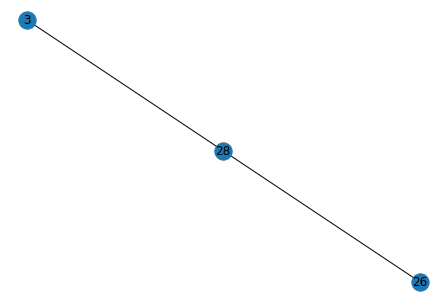

match_branches = [[26, 28]]
edges_to_delete (resolve crossover) = [[3, 26], [3, 28]]
edges_to_create (resolve crossover) = [[26, 28]]
edges_to_delete (cut_limb_network) = [array([ 3, 26]), array([ 3, 28])]
edges_to_create = [[26, 28]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 7, 8, 9}
Comp 1 = {6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30}
curr_limb_copy.deleted_edges = [array([ 3, 26]), array([ 3, 28])]
curr_limb_copy.created_edges = [[26, 28]]
After get best cut: cut_edges = [array([ 3, 26]), array([ 3, 28])], added_edges = [[26, 28]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([0, 1, 2, 3, 4, 5, 7, 8, 9]), array([ 6, 10, 11, 12, 13, 14, 15, 16

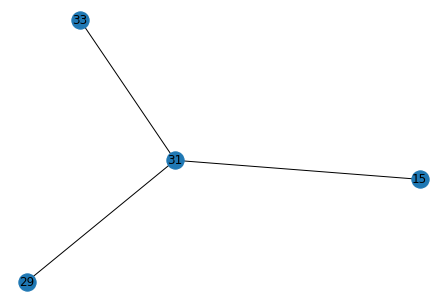

match_branches = [[29, 31], [15, 33]]
edges_to_delete (resolve crossover) = [[15, 29], [15, 31], [29, 33], [31, 33]]
edges_to_create (resolve crossover) = [[29, 31], [15, 33]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[15, 29], [15, 31], [29, 33], [31, 33]]
edges_to_create = [[29, 31], [15, 33]]
Number of connected components = 2
Comp 0 = {0, 6, 7, 18, 19, 21, 23, 24, 25, 29, 30, 31, 32, 34, 35, 37, 40, 41, 43, 44, 46, 49, 50, 52, 58, 59, 60, 61}
Comp 1 = {1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 22, 26, 27, 28, 33, 36, 38, 39, 42, 45, 47, 48, 51, 53, 54, 55, 56, 57}
curr_limb_copy.deleted_edges = [[15, 29], [15, 31], [29, 33], [31, 33]]
curr_limb_copy.created_edges = [[29, 31], [15, 33]]
After get best cut: cut_edges = [[15, 29], [15, 31], [29, 33], [31, 33]], added_edges = [[29, 31], [15, 33]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE 

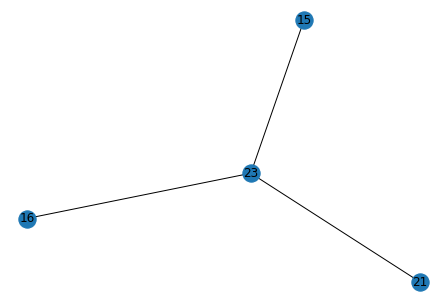

match_branches = [[16, 23]]
edges_to_delete (resolve crossover) = [[15, 16], [15, 21], [15, 23], [16, 21], [21, 23]]
edges_to_create (resolve crossover) = [[16, 23]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[15, 16], [15, 21], [15, 23], [16, 21], [21, 23]]
edges_to_create = [[16, 23]]
Number of connected components = 3
Comp 0 = {0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36}
Comp 1 = {1, 21, 30}
Comp 2 = {20}
curr_limb_copy.deleted_edges = [[15, 16], [15, 21], [15, 23], [16, 21], [21, 23]]
curr_limb_copy.created_edges = [[16, 23]]
After get best cut: cut_edges = [[15, 16], [15, 21], [15, 23], [16, 21], [21, 23]], added_edges = [[16, 23]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path s

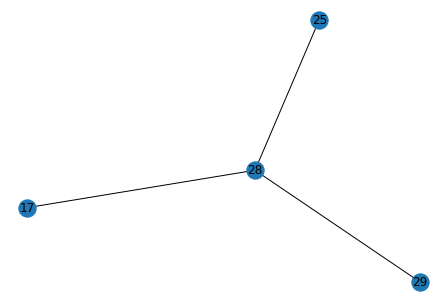

match_branches = [[17, 29], [25, 28]]
edges_to_delete (resolve crossover) = [[17, 25], [17, 28], [25, 29], [28, 29]]
edges_to_create (resolve crossover) = [[17, 29], [25, 28]]
curr_limb.deleted_edges 5 =[[15, 16], [15, 21], [15, 23], [16, 21], [21, 23]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[17, 25], [17, 28], [25, 29], [28, 29]]
edges_to_create = [[17, 29], [25, 28]]
Number of connected components = 4
Comp 0 = {6, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19, 22, 23, 24, 25, 26, 27, 28, 31}
Comp 1 = {32, 0, 2, 34, 3, 33, 4, 5, 7, 35, 36, 13, 17, 29}
Comp 2 = {1, 21, 30}
Comp 3 = {20}
curr_limb_copy.deleted_edges = [[15, 16], [15, 21], [15, 23], [16, 21], [21, 23], [17, 25], [17, 28], [25, 29], [28, 29]]
curr_limb_copy.created_edges = [[16, 23], [17, 29], [25, 28]]
After get best cut: cut_edges = [[17, 25], [17, 28], [25, 29], [28, 29]], added_edges = [[17, 29], [25, 28]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at 

  Edge: [9 6]: curr_angle = 40.52
  Edge: [6 4]: curr_angle = 79.23
  Edge: [4 5]: curr_angle = 128.27
  Edge: [5 7]: curr_angle = 52.04
  Edge: [ 7 10]: curr_angle = 159.06

Total time for doubling_back = 0.2289597988128662
There were 2 edges that passed doubling back threshold of 100
Winning edge [ 7 10] had a doubling back of 159.06495501959708
***inside resolve crossover!!!!****
coordinate_branches = [3, 7, 10]
3 = red
7 = aqua
10 = purple
Angle between 3 and 7 = 123.41 
Angle between 3 and 10 = 28.68 
Angle between 7 and 10 = 29.68 
Final Matches = [[3, 10], [7, 10]]
matched_branches_revised = [[3, 10]]
Original graph


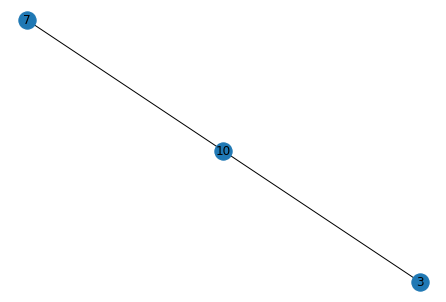

match_branches = [[3, 10]]
edges_to_delete (resolve crossover) = [[3, 7], [7, 10]]
edges_to_create (resolve crossover) = [[3, 10]]
edges_to_delete (cut_limb_network) = [array([3, 7]), array([ 7, 10])]
edges_to_create = [[3, 10]]
Number of connected components = 2
Comp 0 = {10, 3}
Comp 1 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12}
curr_limb_copy.deleted_edges = [array([3, 7]), array([ 7, 10])]
curr_limb_copy.created_edges = [[3, 10]]
After get best cut: cut_edges = [array([3, 7]), array([ 7, 10])], added_edges = [[3, 10]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([10,  3]), array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 11, 12])]


 ------ Total time for Splitting 864691135385207893 = 46.74654698371887 ------


----

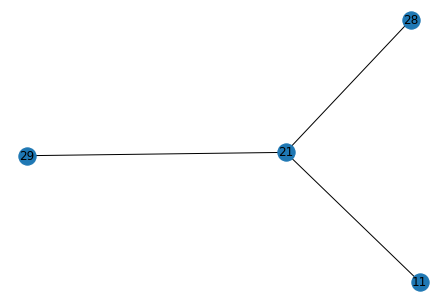

match_branches = [[21, 28]]
edges_to_delete (resolve crossover) = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29]]
edges_to_create (resolve crossover) = [[21, 28]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 73 because skeletal distance was 84.14438314333765 and threshold was 2500
skip_nodes = [73]
edges_to_delete (cut_limb_network) = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29]]
edges_to_create = [[21, 28]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51.0, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 75, 76}
Comp 1 = {11}
Comp 2 = {71, 9, 74, 47, 29}
curr_limb_copy.deleted_edges = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29]]
curr_limb_copy.created_edges = [[21, 28]]
After get best cut: cut_edges = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29]], added

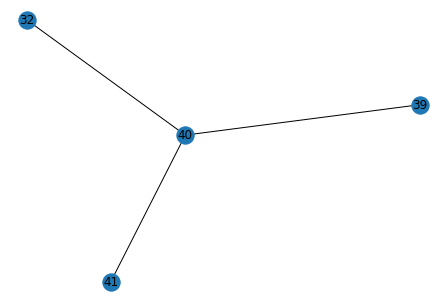

match_branches = [[32, 40]]
edges_to_delete (resolve crossover) = [[32, 39], [32, 41], [39, 40], [39, 41], [40, 41]]
edges_to_create (resolve crossover) = [[32, 40]]
curr_limb.deleted_edges 5 =[[11, 21], [11, 28], [11, 29], [21, 29], [28, 29]]
Skipping endnode 73 because skeletal distance was 84.14438314333765 and threshold was 2500
skip_nodes = [73]
edges_to_delete (cut_limb_network) = [[32, 39], [32, 41], [39, 40], [39, 41], [40, 41]]
edges_to_create = [[32, 40]]
Number of connected components = 5
Comp 0 = {4, 8, 12, 13, 15, 16, 21, 25, 28, 32, 34, 35, 36, 40, 48, 49, 50, 51.0, 52, 53, 54, 55, 56, 57, 58, 59, 60, 64, 65, 66, 68, 72, 73}
Comp 1 = {11}
Comp 2 = {71, 9, 74, 47, 29}
Comp 3 = {0, 1, 2, 3, 5, 6, 7, 10, 14, 17, 18, 19, 20, 22, 23, 24, 26, 27, 30, 31, 33, 37, 38, 39, 42, 43, 44, 45, 46, 61, 62, 63, 67, 75, 76}
Comp 4 = {41, 69, 70}
curr_limb_copy.deleted_edges = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29], [32, 39], [32, 41], [39, 40], [39, 41], [40, 41]]
curr_limb_cop

  Edge: [60 57]: curr_angle = 63.42
  Edge: [57 54]: curr_angle = 22.66
  Edge: [54 53]: curr_angle = 17.89
  Edge: [53 40]: curr_angle = 5.98
  Edge: [40 32]: curr_angle = 18.53
  Edge: [32 21]: curr_angle = 36.09
  Edge: [21 28]: curr_angle = 10.62
  Edge: [28 34]: curr_angle = 2.94
  Edge: [34 36]: curr_angle = 130.36
  Edge: [36 72]: curr_angle = 42.98

Total time for doubling_back = 2.0068490505218506
There were 1 edges that passed doubling back threshold of 100
Winning edge [34 36] had a doubling back of 130.35759779681874
***inside resolve crossover!!!!****
coordinate_branches = [12, 34, 36]
12 = red
34 = aqua
36 = purple
Angle between 12 and 34 = 14.15 
Angle between 12 and 36 = 48.62 
Angle between 34 and 36 = 139.17 
Final Matches = [[12, 34]]
matched_branches_revised = [[12, 34]]
Original graph


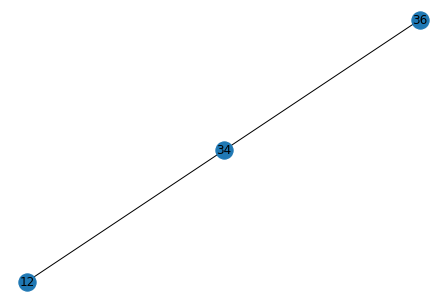

match_branches = [[12, 34]]
edges_to_delete (resolve crossover) = [[12, 36], [34, 36]]
edges_to_create (resolve crossover) = [[12, 34]]
edges_to_delete (cut_limb_network) = [array([12, 36]), array([34, 36])]
edges_to_create = [[12, 34]]
Number of connected components = 6
Comp 0 = {64, 65, 66, 36, 68, 72, 73, 8, 15, 16, 25}
Comp 1 = {4, 12, 13, 21, 28, 32, 34, 35, 40, 48, 49, 50, 51.0, 52, 53, 54, 55, 56, 57, 58, 59, 60}
Comp 2 = {11}
Comp 3 = {71, 9, 74, 47, 29}
Comp 4 = {0, 1, 2, 3, 5, 6, 7, 10, 14, 17, 18, 19, 20, 22, 23, 24, 26, 27, 30, 31, 33, 37, 38, 39, 42, 43, 44, 45, 46, 61, 62, 63, 67, 75, 76}
Comp 5 = {41, 69, 70}
curr_limb_copy.deleted_edges = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29], [32, 39], [32, 41], [39, 40], [39, 41], [40, 41], array([12, 36]), array([34, 36])]
curr_limb_copy.created_edges = [[21, 28], [32, 40], [12, 34]]
After get best cut: cut_edges = [array([12, 36]), array([34, 36])], added_edges = [[12, 34]]
total_soma_paths_to_cut = [[11, 21], [11, 28], 

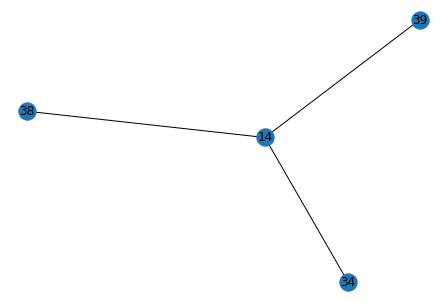

match_branches = []
edges_to_delete (resolve crossover) = [[14, 34], [14, 38], [14, 39], [34, 38], [34, 39], [38, 39]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
Skipping endnode 20 because skeletal distance was 532.2891873974291 and threshold was 2500
skip_nodes = [20]
edges_to_delete (cut_limb_network) = [[14, 34], [14, 38], [14, 39], [34, 38], [34, 39], [38, 39]]
edges_to_create = []
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 36, 37, 41, 42, 43, 44}
Comp 1 = {33, 34, 23}
Comp 2 = {38}
Comp 3 = {39}
Comp 4 = {40}
curr_limb_copy.deleted_edges = [[14, 34], [14, 38], [14, 39], [34, 38], [34, 39], [38, 39]]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [[14, 34], [14, 38], [14, 39], [34, 38], [34, 39], [38, 39]], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total num

  Edge: [33 29]: curr_angle = 33.68
  Edge: [29 28]: curr_angle = 8.5
  Edge: [28 25]: curr_angle = 16.28
  Edge: [25 14]: curr_angle = 55.31
  Edge: [14 17]: curr_angle = 38.62
  Edge: [17 15]: curr_angle = 103.26
  Edge: [15 21]: curr_angle = 52.06
  Edge: [21 31]: curr_angle = 25.17
  Edge: [31 35]: curr_angle = 11.39
  Edge: [35 43]: curr_angle = 42.58
  Edge: [43 42]: curr_angle = 22.08
  Edge: [42 45]: curr_angle = 16.43
  Edge: [45 48]: curr_angle = 29.5

Total time for doubling_back = 0.9293854236602783
There were 1 edges that passed doubling back threshold of 100
Winning edge [17 15] had a doubling back of 103.25963227575429
***inside resolve crossover!!!!****
coordinate_branches = [15, 16, 17]
15 = red
16 = aqua
17 = purple
Angle between 15 and 16 = 142.36 
Angle between 15 and 17 = 132.19 
Angle between 16 and 17 = 120.38 
Final Matches = []
matched_branches_revised = []
Original graph


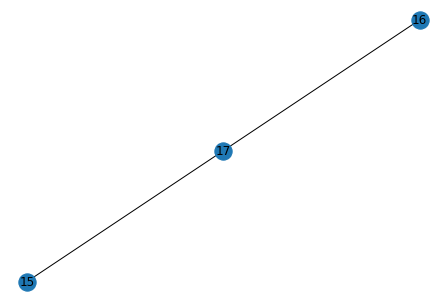

match_branches = []
edges_to_delete (resolve crossover) = [[15, 16], [15, 17], [16, 17]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([15, 16]), array([15, 17]), array([16, 17])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 6, 7, 10, 11, 12, 13, 15, 19, 21, 31, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64}
Comp 1 = {16}
Comp 2 = {5, 8, 9, 14, 17, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 47, 49}
curr_limb_copy.deleted_edges = [array([15, 16]), array([15, 17]), array([16, 17])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([15, 16]), array([15, 17]), array([16, 17])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No val

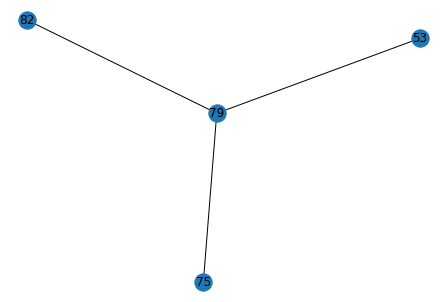

match_branches = [[75, 82]]
edges_to_delete (resolve crossover) = [[53, 75], [53, 79], [53, 82], [75, 79], [79, 82]]
edges_to_create (resolve crossover) = [[75, 82]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 84 because skeletal distance was 244.88155152570386 and threshold was 2500
skip_nodes = [84]
edges_to_delete (cut_limb_network) = [[53, 75], [53, 79], [53, 82], [75, 79], [79, 82]]
edges_to_create = [[75, 82]]
Number of connected components = 3
Comp 0 = {96, 64, 66, 98, 97, 102, 103, 70, 104, 74, 75, 105, 45, 82, 50, 84, 85, 88}
Comp 1 = {34, 36, 40, 53, 29}
Comp 2 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 67, 68, 69, 71, 72, 73, 76, 77, 78, 79, 80, 81, 83, 86, 87, 89, 90, 91, 92, 93, 94, 95, 99, 100, 101}
curr_limb_copy.deleted_edges = [[53, 75], [53, 79], [53, 82], [75, 79], [79, 82]]
curr_limb_

  Edge: [35 28]: curr_angle = 27.49
  Edge: [28 23]: curr_angle = 32.1
  Edge: [23 13]: curr_angle = 53.59
  Edge: [13 12]: curr_angle = 137.65
  Edge: [12 16]: curr_angle = 17.77
  Edge: [16 19]: curr_angle = 16.26
  Edge: [19 40]: curr_angle = 65.11

Total time for doubling_back = 0.4150245189666748
There were 1 edges that passed doubling back threshold of 100
Winning edge [13 12] had a doubling back of 137.65337398984917
***inside resolve crossover!!!!****
coordinate_branches = [1, 12, 13]
1 = red
12 = aqua
13 = purple
Angle between 1 and 12 = 11.37 
Angle between 1 and 13 = 47.04 
Angle between 12 and 13 = 138.25 
Final Matches = [[1, 12]]
matched_branches_revised = [[1, 12]]
Original graph


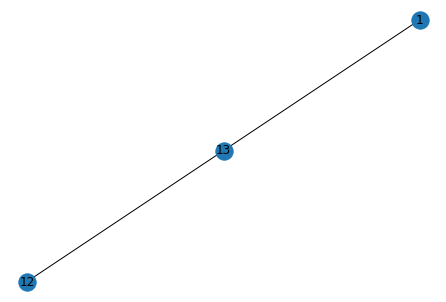

match_branches = [[1, 12]]
edges_to_delete (resolve crossover) = [[1, 13], [12, 13]]
edges_to_create (resolve crossover) = [[1, 12]]
edges_to_delete (cut_limb_network) = [array([ 1, 13]), array([12, 13])]
edges_to_create = [[1, 12]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 15, 16, 18, 19, 24, 25, 27, 29, 31, 32, 33, 34, 38, 39, 40, 41, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76}
Comp 1 = {35, 36, 37, 7, 10, 42, 13, 14, 45, 17, 20, 21, 22, 23, 26, 28, 30}
curr_limb_copy.deleted_edges = [array([ 1, 13]), array([12, 13])]
curr_limb_copy.created_edges = [[1, 12]]
After get best cut: cut_edges = [array([ 1, 13]), array([12, 13])], added_edges = [[1, 12]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL

  Edge: [40 39]: curr_angle = 22.13
  Edge: [39 38]: curr_angle = 16.01
  Edge: [38 41]: curr_angle = 8.64
  Edge: [41 43]: curr_angle = 11.68
  Edge: [43 46]: curr_angle = 46.89
  Edge: [46 48]: curr_angle = 31.46
  Edge: [48 57]: curr_angle = 20.84
  Edge: [57 59]: curr_angle = 33.97
  Edge: [59 62]: curr_angle = 4.27
  Edge: [62 63]: curr_angle = 42.64
  Edge: [63 65]: curr_angle = 33.34
  Edge: [65 70]: curr_angle = 29.86
  Edge: [70 69]: curr_angle = 26.83
  Edge: [69 71]: curr_angle = 5.63
  Edge: [71 73]: curr_angle = 26.84

Total time for doubling_back = 1.3284976482391357

Attempting the width jump check (attempting from both sides)
  Edge: [40 39]: jump = -281.9
  Edge: [39 38]: jump = -232.95
  Edge: [38 41]: jump = -45.0
  Edge: [41 43]: jump = -87.17
  Edge: [43 46]: jump = -198.97
  Edge: [46 48]: jump = -216.41
  Edge: [48 57]: jump = -4.47
  Edge: [57 59]: jump = -130.28
  Edge: [59 62]: jump = 131.93
  Edge: [62 63]: jump = 147.49
  Edge: [63 65]: jump = 390.43
Adding 

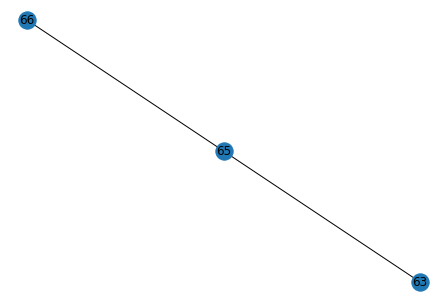

match_branches = [[65, 66]]
edges_to_delete (resolve crossover) = [[63, 65], [63, 66]]
edges_to_create (resolve crossover) = [[65, 66]]
edges_to_delete (cut_limb_network) = [array([63, 65]), array([63, 66])]
edges_to_create = [[65, 66]]
Number of connected components = 3
Comp 0 = {64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 52, 54, 55}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 15, 16, 18, 19, 24, 25, 27, 29, 31, 32, 33, 34, 38, 39, 40, 41, 43, 44, 46, 47, 48, 49, 50, 51, 53, 56, 57, 58, 59, 60, 61, 62, 63}
Comp 2 = {35, 36, 37, 7, 10, 42, 13, 14, 45, 17, 20, 21, 22, 23, 26, 28, 30}
curr_limb_copy.deleted_edges = [array([ 1, 13]), array([12, 13]), array([63, 65]), array([63, 66])]
curr_limb_copy.created_edges = [[1, 12], [65, 66]]
After get best cut: cut_edges = [array([63, 65]), array([63, 66])], added_edges = [[65, 66]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total

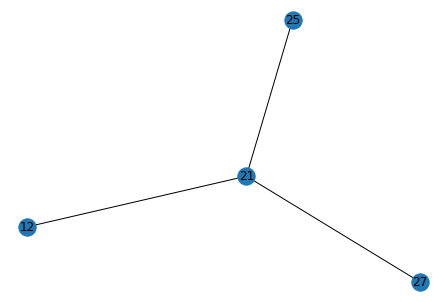

match_branches = [[12, 27]]
edges_to_delete (resolve crossover) = [[12, 21], [12, 25], [21, 25], [21, 27], [25, 27]]
edges_to_create (resolve crossover) = [[12, 27]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[12, 21], [12, 25], [21, 25], [21, 27], [25, 27]]
edges_to_create = [[12, 27]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 4, 7, 8, 10, 11, 12, 13, 14, 27}
Comp 1 = {3, 5, 6, 9, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64}
Comp 2 = {25}
curr_limb_copy.deleted_edges = [[12, 21], [12, 25], [21, 25], [21, 27], [25, 27]]
curr_limb_copy.created_edges = [[12, 27]]
After get best cut: cut_edges = [[12, 21], [12, 25], [21, 25], [21, 27], [25, 27]], added_edges = [[12, 27]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the s

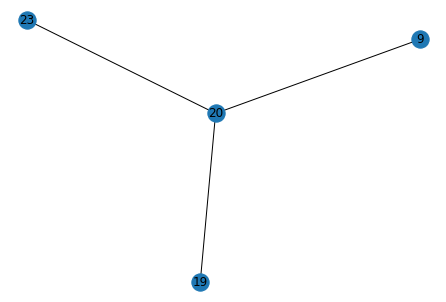

match_branches = [[19, 20]]
edges_to_delete (resolve crossover) = [[9, 19], [9, 20], [9, 23], [19, 23], [20, 23]]
edges_to_create (resolve crossover) = [[19, 20]]
curr_limb.deleted_edges 5 =[[12, 21], [12, 25], [21, 25], [21, 27], [25, 27]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[9, 19], [9, 20], [9, 23], [19, 23], [20, 23]]
edges_to_create = [[19, 20]]
Number of connected components = 6
Comp 0 = {0, 1, 2, 4, 7, 8, 10, 11, 12, 13, 14, 27}
Comp 1 = {5, 15, 16, 17, 18, 19, 20, 21}
Comp 2 = {25}
Comp 3 = {9}
Comp 4 = {3, 6, 23, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64}
Comp 5 = {22}
curr_limb_copy.deleted_edges = [[12, 21], [12, 25], [21, 25], [21, 27], [25, 27], [9, 19], [9, 20], [9, 23], [19, 23], [20, 23]]
curr_limb_copy.created_edges = [[12, 27], [19, 20]]
After get best cut: cut_edges = [[9, 19], [9, 20], [9, 23], [19, 23], [20, 23]], added_edges = [[19, 20

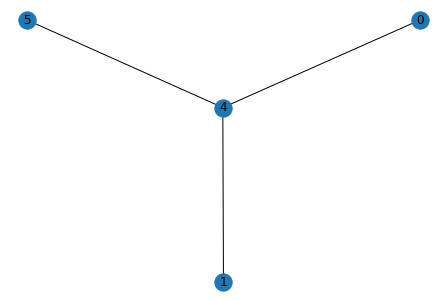

match_branches = [[0, 5]]
edges_to_delete (resolve crossover) = [[0, 1], [0, 4], [1, 4], [1, 5], [4, 5]]
edges_to_create (resolve crossover) = [[0, 5]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[0, 1], [0, 4], [1, 4], [1, 5], [4, 5]]
edges_to_create = [[0, 5]]
Number of connected components = 4
Comp 0 = {0, 2, 5, 6, 7, 8, 11, 12, 13}
Comp 1 = {1}
Comp 2 = {9, 10, 4}
Comp 3 = {3}
curr_limb_copy.deleted_edges = [[0, 1], [0, 4], [1, 4], [1, 5], [4, 5]]
curr_limb_copy.created_edges = [[0, 5]]
After get best cut: cut_edges = [[0, 1], [0, 4], [1, 4], [1, 5], [4, 5]], added_edges = [[0, 5]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 4: [array([ 0,  2,  5,  6,  7,  8, 11, 12, 13]), 

  Edge: [3 4]: curr_angle = 36.3
  Edge: [4 5]: curr_angle = 14.09
  Edge: [ 5 10]: curr_angle = 154.0
  Edge: [10  8]: curr_angle = 20.07

Total time for doubling_back = 0.4275319576263428
There were 1 edges that passed doubling back threshold of 100
Winning edge [ 5 10] had a doubling back of 154.00024240125373
***inside resolve crossover!!!!****
coordinate_branches = [5, 10, 11]
5 = red
10 = aqua
11 = purple
Angle between 5 and 10 = 154.46 
Angle between 5 and 11 = 10.05 
Angle between 10 and 11 = 25.91 
Final Matches = [[5, 11], [10, 11]]
matched_branches_revised = [[5, 11]]
Original graph


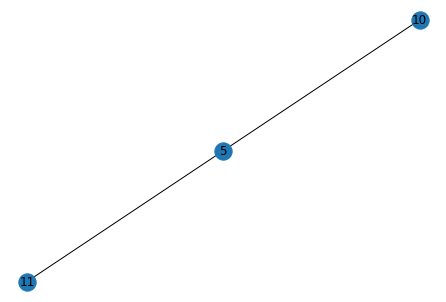

match_branches = [[5, 11]]
edges_to_delete (resolve crossover) = [[5, 10], [10, 11]]
edges_to_create (resolve crossover) = [[5, 11]]
edges_to_delete (cut_limb_network) = [array([ 5, 10]), array([10, 11])]
edges_to_create = [[5, 11]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 11, 12}
Comp 1 = {8, 9, 10}
curr_limb_copy.deleted_edges = [array([ 5, 10]), array([10, 11])]
curr_limb_copy.created_edges = [[5, 11]]
After get best cut: cut_edges = [array([ 5, 10]), array([10, 11])], added_edges = [[5, 11]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  1,  2,  3,  4,  5,  6,  7, 11, 12]), array([ 8,  9, 10])]


 ------ Total time for Splitting 864691135725648447 = 105.75573229789734 ----

In [11]:
start_time = time.time()
if not test_mode:
    time.sleep(random.randint(0, 800))
print('Populate Started')
if not test_mode:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
else:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
print('Populate Done')

print(f"Total time for NeuronSplitSuggestions populate = {time.time() - start_time}")